<a href="https://colab.research.google.com/github/sapinspys/DS-Unit-2-Regression-Classification/blob/master/assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 104, done.
remote: Total 104 (delta 0), reused 0 (delta 0), pack-reused 104
Receiving objects: 100% (104/104), 17.31 MiB | 15.39 MiB/s, done.
Resolving deltas: 100% (41/41), done.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> origin/master
     |████████████████████████████████| 92kB 5.7MB/s 
     |████████████████████████████████| 112kB 15.0MB/s 
     |████████████████████████████████| 133kB 58.1MB/s 
     |████████████████████████████████| 57.7MB 504kB/s 
     |████████████████████████████████| 7.1MB 36.6MB/s 
     |████████████████████████████████| 235kB 49.4MB/s 
     |████████████████████████████████| 614kB 40.4MB/s 
     |████████████████████████████████| 225kB 47.2MB/s 
     |████████████████████████████████| 768kB 45.1MB/s 
     |████████████████████████████████| 51kB 21.2MB/s 
     |█████████

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# What's the distribution of the target, price, and features such as longitude and latitude? 
# what is the mean price in your subset of the data?

pd.options.display.float_format = '{:,.1f}'.format
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,"49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0","49,352.0"
mean,1.2,1.5,40.7,-74.0,"3,830.2",0.5,0.5,0.5,0.4,0.4,0.4,0.4,0.1,0.3,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
std,0.5,1.1,0.6,1.2,"22,066.9",0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.2,0.4,0.4,0.4,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
min,0.0,0.0,0.0,-118.3,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,40.7,-74.0,"2,500.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,1.0,40.8,-74.0,"3,150.0",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,2.0,40.8,-74.0,"4,100.0",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,10.0,8.0,44.9,0.0,"4,490,000.0",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
df.query('price < 500')

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
7654,1.0,1,2016-04-14 03:39:47,"Now available, absolutely stunning 1 bedroom 1...",Broadway,40.8,-74.0,401,2350 Broadway,low,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28626,1.0,0,2016-05-24 05:24:56,<p><a website_redacted,Madison,40.7,-74.0,43,60 Madison,low,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
43824,1.0,0,2016-04-02 02:43:15,<p><a website_redacted,W 30th St.,40.7,-74.0,45,140 W 30th St.,low,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
mask = df['price'] > 50

df = df[mask]

In [0]:
df.bathrooms.value_counts()

1.0     39420
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
10.0        1
7.0         1
Name: bathrooms, dtype: int64

In [0]:
 df.bedrooms.value_counts()

1    15752
2    14623
0     9473
3     7276
4     1929
5      247
6       46
8        2
7        2
Name: bedrooms, dtype: int64

In [0]:
mask = (df['bathrooms'] < 6) & (df['bedrooms'] < 6)

df = df[mask]

In [0]:
print(df.bathrooms.value_counts(), "\n")
print(df.bedrooms.value_counts())

1.0    39419
2.0     7649
3.0      725
1.5      644
0.0      313
2.5      276
4.0      146
3.5       70
4.5       29
5.0       19
5.5        5
Name: bathrooms, dtype: int64 

1    15752
2    14622
0     9473
3     7276
4     1929
5      243
Name: bedrooms, dtype: int64


In [0]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,"49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0","49,295.0"
mean,1.2,1.5,40.7,-74.0,"3,820.4",0.5,0.5,0.5,0.4,0.4,0.4,0.4,0.1,0.3,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
std,0.5,1.1,0.6,1.1,"22,071.8",0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.2,0.4,0.4,0.4,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
min,0.0,0.0,0.0,-118.3,401.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,40.7,-74.0,"2,499.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,1.0,40.8,-74.0,"3,150.0",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,2.0,40.8,-74.0,"4,100.0",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,5.5,5.0,44.9,0.0,"4,490,000.0",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
df[df.price > 10000]

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
41,3.0,4,2016-04-12 05:21:21,Ultimate luxury in the sky ! conv. 4 bedrooms ...,E 79,40.8,-74.0,15000,350 E 79,low,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0
85,3.5,4,2016-04-09 04:08:44,"Kitchens: GE Profile 36 Cook-top, Stainless St...",East 86th Street,40.8,-74.0,13500,201 East 86th Street,low,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
149,1.0,3,2016-04-15 04:32:14,Get one one month free on a 13 month lease! Th...,E 74 Street,40.8,-74.0,13500,501 E 74 Street,low,1,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0
205,2.5,3,2016-04-13 02:29:37,CooperCooper.com :: Listing ID #6AA.6001; Acce...,West 23rd Street,40.7,-74.0,15500,60 West 23rd Street,low,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
317,3.0,3,2016-04-14 05:26:29,"Brand new three bedroom, three bathroom 2000 s...",5th Ave.,40.7,-74.0,14000,99 5th Ave.,low,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
366,3.0,5,2016-06-08 14:27:49,SPECTACULAR NEWLY RENOVATED 5-BEDROOM & 3-BATH...,MASSIVE 5BED/3BATH* PANORAMIC BK VIEWS* 2000SQFT,40.7,-74.0,11257,254 Front street,low,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
368,2.0,2,2016-04-08 05:57:29,Be the first to live in this extraordinary apa...,W 64th St.,40.8,-74.0,13000,20 W 64th St.,low,1,0,1,0,1,1,1,0,1,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0
371,3.0,3,2016-04-07 05:34:51,Perfect UWS location near Central Park & Linco...,Broadway,40.8,-74.0,15000,1930 Broadway,low,1,0,1,0,1,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
420,3.0,3,2016-04-11 02:49:08,"INCREDIBLE, Rare Deal for a Luxury, white glov...",E 34th St.,40.7,-74.0,11077,222 E 34th St.,low,1,1,1,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0
538,2.0,3,2016-04-08 05:51:50,Upper East side Luxurious building! Experience...,E 90th St.,40.8,-74.0,11500,170 E 90th St.,low,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
mask = df.price < 5000

df = df[mask]

In [0]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,"41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0","41,973.0"
mean,1.1,1.3,40.7,-74.0,"3,009.8",0.5,0.5,0.5,0.4,0.4,0.4,0.3,0.1,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.3,1.0,0.6,1.2,839.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.2,0.4,0.4,0.4,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
min,0.0,0.0,0.0,-118.3,401.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,40.7,-74.0,"2,400.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,1.0,40.8,-74.0,"2,920.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,2.0,40.8,-74.0,"3,591.0",1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.5,5.0,44.6,0.0,"4,999.0",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
# Mean price: ~30010

In [0]:
import plotly.express as px

In [0]:
px.scatter(df, x="bedrooms", y="price")

In [0]:
px.scatter(df, x="bedrooms", y="price", trendline="ols")

In [0]:
from sklearn.linear_model import LinearRegression # ESTIMATOR CLASS

In [0]:
model = LinearRegression() # INSTANTIATE CLASS

In [0]:
features = ['bedrooms']
target = 'price'
X = df[features]
y = df[target]

In [0]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(X) # APPLY MODEL

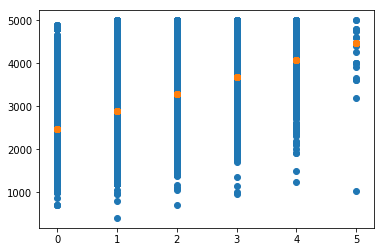

In [0]:
# ACTUAL VS PREDICTED
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.scatter(X,y_pred)

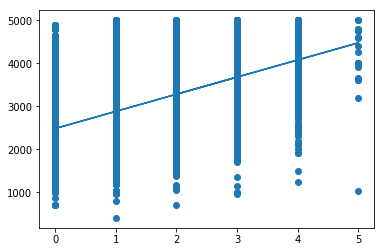

In [0]:
# INTERPOLATE THE ABOVE
plt.scatter(X,y)
plt.plot(X,y_pred)

In [0]:
m = model.coef_[0]

In [0]:
b = model.intercept_

In [0]:
# EQUATION FOR INTERPOLATED LINE
print(f"y = {m}x + {b}")

y = 398.874553392852x + 2479.9032807900558


In [0]:
print(f"price = {m}*bedrooms + {b}")

price = 398.874553392852*bedrooms + 2479.9032807900558


In [0]:
def predict(bedrooms):
  """ """
  y_pred = model.predict([[bedrooms]])
  estimate = y_pred[0]
  coeff = model.coef_[0]
  
  result = f"${estimate:,.0f} estimated price for {bedrooms:,.0f} bedroom apartment. "
  explanation = f"Each additional bedroom is associated with a ${coeff:,.0f} increase in this model."  
  return result + explanation

predict(1)

'$2,879 estimated price for 1 bedroom apartment. Each additional bedroom is associated with a $399 increase in this model.'

In [0]:
predict(3)

'$3,677 estimated price for 3 bedroom apartment. Each additional bedroom is associated with a $399 increase in this model.'